<a href="https://colab.research.google.com/github/Ayush6459/DLCVNLP_practice/blob/master/Covid19_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])

In [5]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
101395,2021-06-20,Zimbabwe,41779,37184,1672
101396,2021-06-21,Zimbabwe,42195,37200,1685
101397,2021-06-22,Zimbabwe,42714,37288,1691
101398,2021-06-23,Zimbabwe,43480,37477,1692


In [7]:
df['Total Case'] = df[['Confirmed','Recovered','Deaths']].sum(axis=1)
df

,Date,Country,Confirmed,Recovered,Deaths,Total Case
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
101395,2021-06-20,Zimbabwe,41779,37184,1672,80635
101396,2021-06-21,Zimbabwe,42195,37200,1685,81080
101397,2021-06-22,Zimbabwe,42714,37288,1691,81693
101398,2021-06-23,Zimbabwe,43480,37477,1692,82649


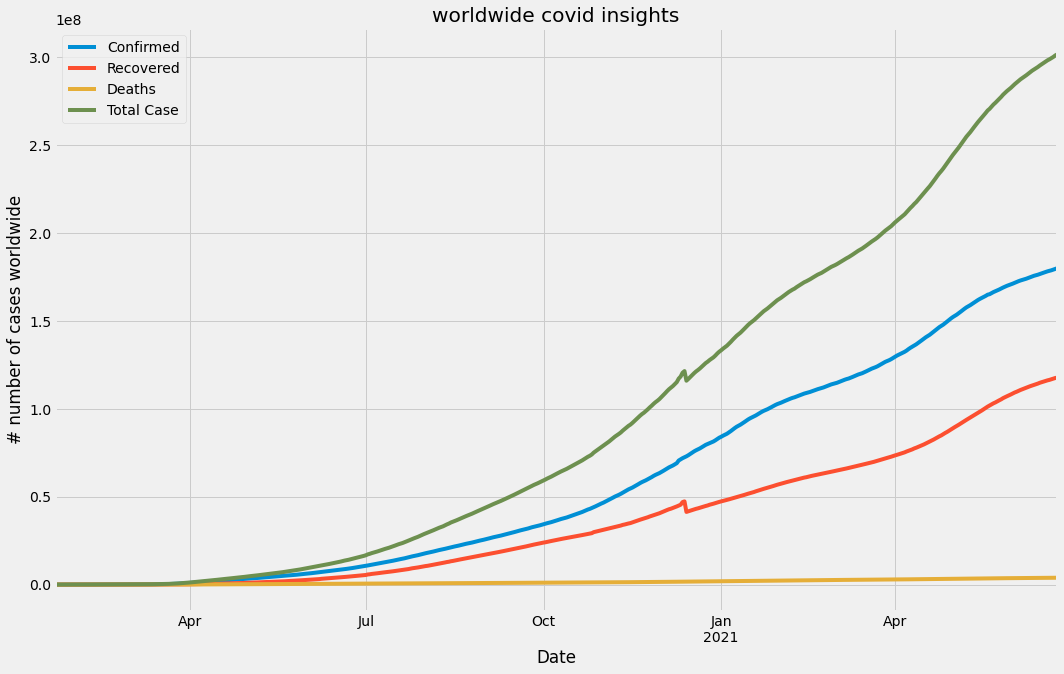

In [8]:
# worldwide cases 
worldwide_df = df.groupby(['Date']).sum()
worldwide = worldwide_df.plot(figsize=(16,10))
worldwide.set_xlabel('Date')
worldwide.set_ylabel('# number of cases worldwide')
worldwide.title.set_text('worldwide covid insights')

plt.show()

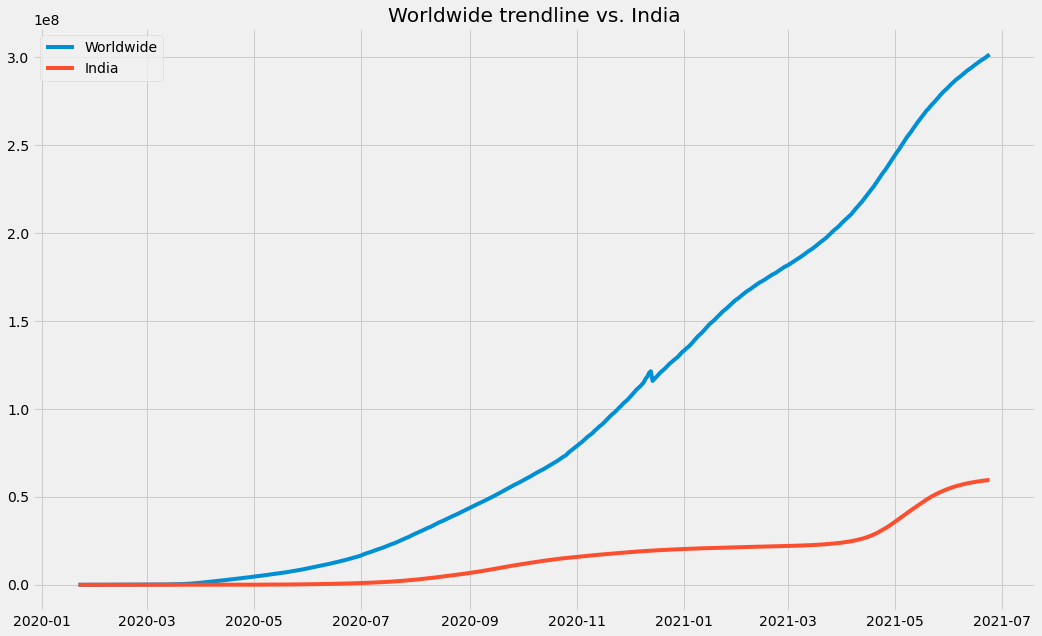

In [16]:
# India vs world wide trend 

worldwide_df = df.groupby(['Date']).sum()
India = df[df['Country']=='India'].groupby(['Date']).sum()

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Case']], label='Worldwide')
ax.plot(India[['Total Case']], label='India')
ax.title.set_text('Worldwide trendline vs. India')

plt.legend()
plt.show()

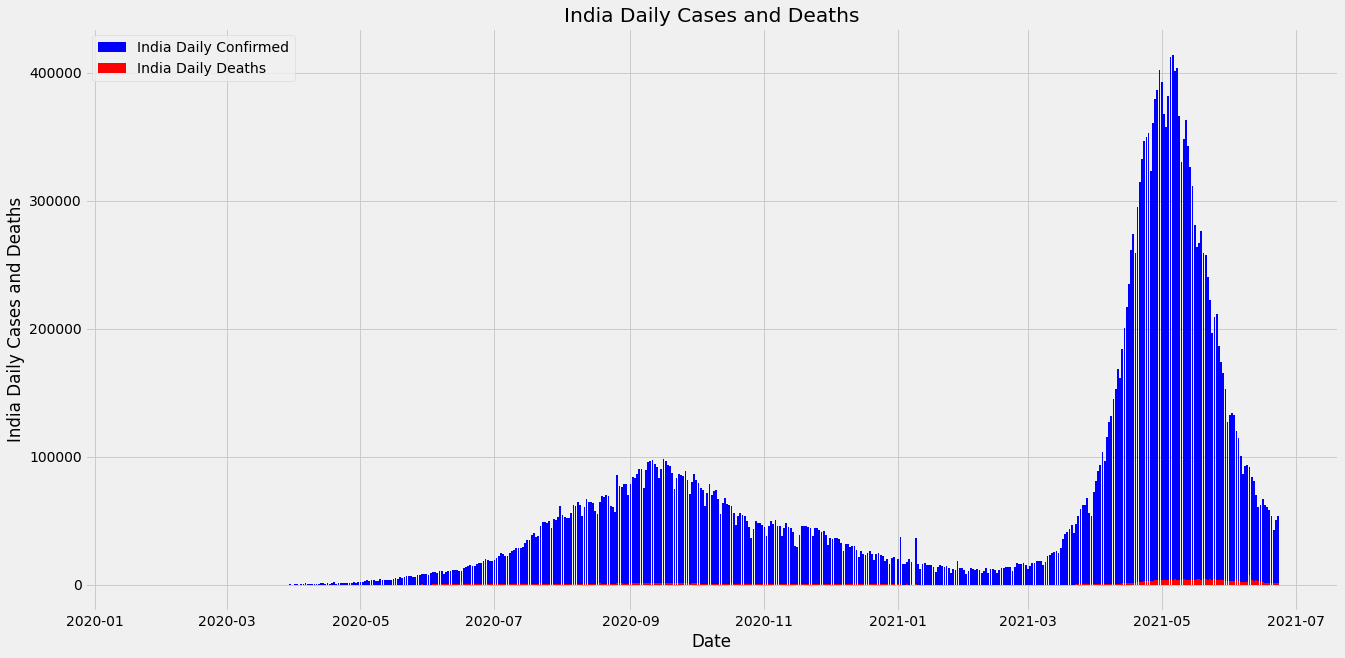

In [17]:

# United States Daily Cases and Deaths
India = India.reset_index()
India['Daily Confirmed'] = India['Confirmed'].sub(India['Confirmed'].shift())
India['Daily Deaths'] = India['Deaths'].sub(India['Deaths'].shift())

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.bar(India['Date'], India['Daily Confirmed'], color='b', label='India Daily Confirmed')
ax.bar(India['Date'], India['Daily Deaths'], color='r', label='India Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('India Daily Cases and Deaths')
ax.title.set_text('India Daily Cases and Deaths')

plt.legend(loc='upper left')
plt.show()

                    Date         Country  ...   Deaths  Total Case
94639         2021-06-24              US  ...   603178    34193659
41599         2021-06-24           India  ...   391981    59538499
12479         2021-06-24          Brazil  ...   509141    34790854
32759         2021-06-24          France  ...   111068     6341143
94119         2021-06-24          Turkey  ...    49417    10697373
75399         2021-06-24          Russia  ...   129278    10313789
96719         2021-06-24  United Kingdom  ...   128312     4844715
3639          2021-06-24       Argentina  ...    91438     8409635
44719         2021-06-24           Italy  ...   127362     8449091
19759         2021-06-24        Colombia  ...   102636     7932536
Rest of World        NaT   Rest of World  ...  1655232   116067806

[11 rows x 6 columns]


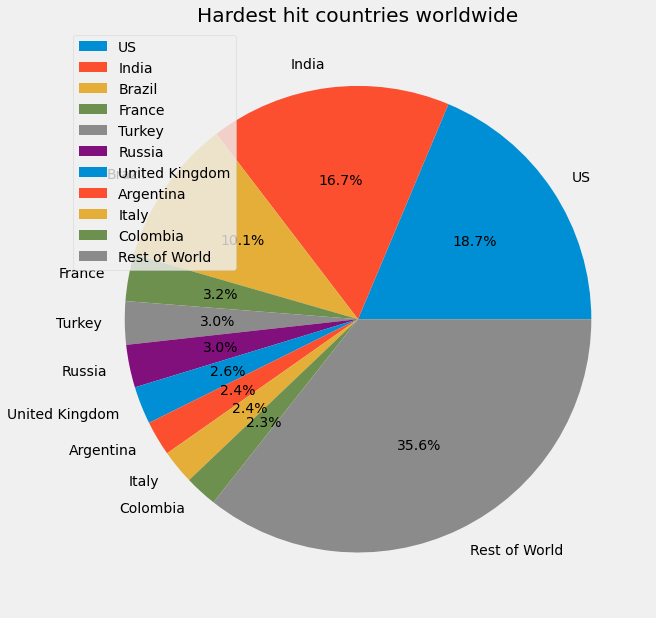

In [30]:

# Top 10 Hardest hit countries till 24/06/2021 

from datetime import date ,timedelta

date = '2021-06-24'
last_df= df[df['Date']==date]
top_10 = last_df.sort_values(['Confirmed'],ascending=False)[:10]
top_10.loc['Rest of World'] = last_df.sort_values(['Confirmed'],ascending=False)[10:].sum()
top_10.loc['Rest of World','Country'] = 'Rest of World'

print(top_10)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.pie(top_10['Confirmed'],labels=top_10['Country'],autopct='%1.1f%%')
ax.title.set_text('Hardest hit countries worldwide')
plt.legend(loc= 'upper left')
plt.show()